In [146]:
import numpy

In [147]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import sys
sys.path.append('../src')

from dataset import Tell1Dataset, DatasetTree
import dataset as DS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()
import matplotlib
matplotlib.rcParams['image.cmap'] = 'rainbow'

Loading BokehJS ...

Read dataset:

In [149]:
dataset = Tell1Dataset(r'C:\repositories\Phd\LHCb\tell1_analysis\data\calibrations')

In [150]:
def sensor_histogram(data):
    x_data_list = []
    y_data_list = []
    for i,column in enumerate(data):
        y_data = list(data[column].values)
        y_data_list += y_data
        x_data_list += [i]*len(y_data)
    return x_data_list, y_data_list

## R-type, ghosting

To determine whats causing this ghosting, lets just inspect entries with values greater than 15.0

In [151]:
dfhr = dataset.dfh['R'].df
increased = dfhr.iloc[:,9:]>15.0

Lets check the sum of entriex exceeding 15 per sensor calibration

In [152]:
high_values = dfhr[increased.sum(axis=1)>400]

And see at what dates did they occur

In [153]:
bad_calibration = high_values['datetime'].unique()
bad_calibration

array(['2012-07-30T00:00:00.000000000', '2012-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

Those are the dates that correspond with callibration process errors.

In [154]:
wrong = dataset.dfh.df[dataset.dfh.df['datetime'].isin(bad_calibration)]
other = dataset.dfh.df[~dataset.dfh.df['datetime'].isin(bad_calibration)]
wrong = DS.DatasetTree.from_df(wrong)
other = DS.DatasetTree.from_df(other)

# Wild things and vampires

In [155]:
filtered = (other.df.iloc[:,9:]>=50) & (other.df.iloc[:,9:]!=127.0)
outliers = other.df.iloc[:,9:][filtered]
occurance_per_row = filtered.sum(axis=1)
chart1_df = other.df.drop(other.df.iloc[:,9:].columns , axis=1)
chart1_df['occurances'] = occurance_per_row
chart2_df = chart1_df[chart1_df.occurances != 0]

In [156]:
x = chart2_df.datetime
labels = chart2_df['sensor_number'].unique()
todf = {k:[] for k in labels}
yx = []
for date in x:
    for label in labels:
        data_ = chart2_df[chart2_df.datetime==date]
        val = data_[data_.sensor_number==label].occurances.values
        if not val:
            val = 0
        else:
            val = val[0]
        todf[label].append(val)
occurances_df = pd.DataFrame(todf,index=x.values)
occurances_df = occurances_df.sort_index()

In [157]:
occurances_df

#67  #85  #94
2010-08-16    0   30    0
2010-08-18    0    2    0
2011-03-07    0   32    0
2012-04-27    1    0    0
2016-11-07   31    0    0
2016-11-11   32    0    0
2017-05-21    0    0    2
2017-06-21    0    0    2
2017-07-18    0    0    2

Text(0,0.5,'Number of occurances')

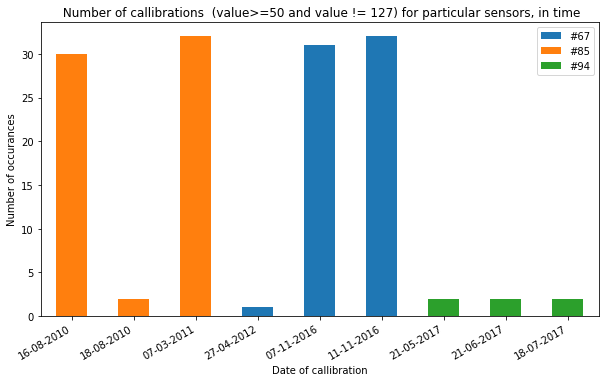

In [172]:
fig, axe = plt.subplots(1,1,figsize=(10,6))
occurances_df.plot(kind='bar', ax=axe,align="center", stacked=True)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(occurances_df.index.to_series().dt.strftime("%d-%m-%Y")))
fig.autofmt_xdate()
axe.set_title(' Number of callibrations  (value>=50 and value != 127) for particular sensors, in time')
axe.set_xlabel('Date of callibration')
axe.set_ylabel('Number of occurances')

In [159]:
persensor = chart1_df.groupby(['sensor_number']).sum()

In [160]:
persensor[persensor['occurances']!=0]

Zmod  occurances
sensor_number                  
#67           -3640          64
#85            3920          64
#94            7700           6

all are phi-type

Text(0,0.5,'ADC')

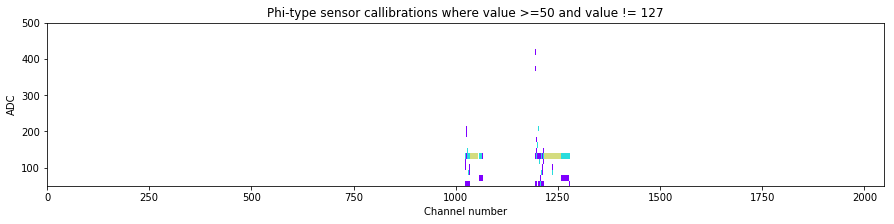

In [164]:
data = other[occurance_per_row!=0].iloc[:,9:]
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30], range=[[0,2048],[50,500]],cmin=1)
axe.set_title('Phi-type sensor callibrations where value >=50 and value != 127')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

../src\dataset.py:108: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return self.df[item]


Text(0,0.5,'ADC')

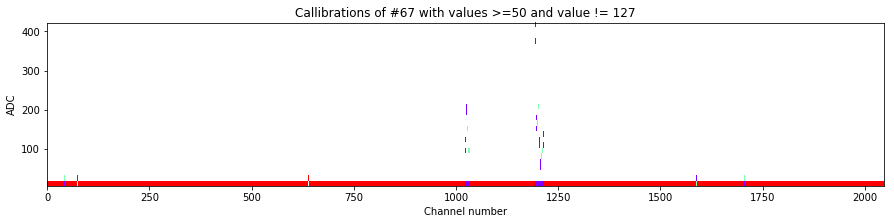

In [165]:
data = other["#67"][occurance_per_row!=0].iloc[:,9:]
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30],cmin=1)
axe.set_title('Callibrations of #67 with values >=50 and value != 127')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

../src\dataset.py:108: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return self.df[item]


Text(0,0.5,'ADC')

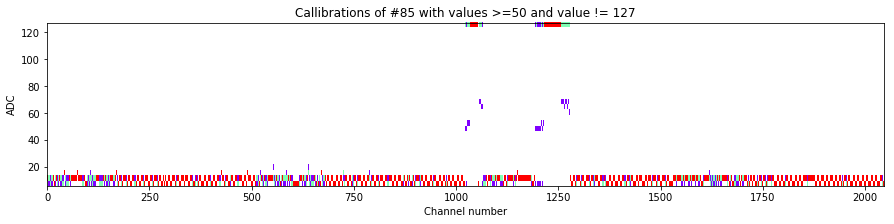

In [166]:
data = other["#85"][occurance_per_row!=0].iloc[:,9:]
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30],cmin=1)
axe.set_title('Callibrations of #85 with values >=50 and value != 127')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

../src\dataset.py:108: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return self.df[item]


Text(0,0.5,'ADC')

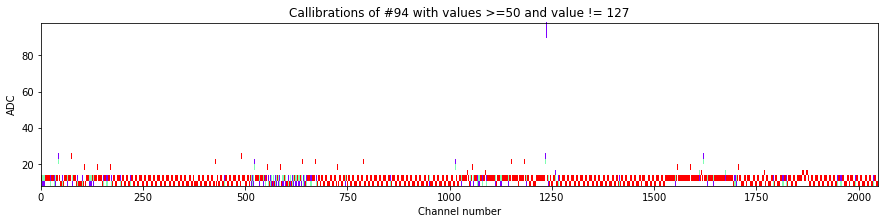

In [167]:
data = other["#94"][occurance_per_row!=0].iloc[:,9:]
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30],cmin=1)
axe.set_title('Callibrations of #94 with values >=50 and value != 127')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

# Values purely 127 

In [168]:
filtered2 = (other.df.iloc[:,9:]>=50) & ~filtered
outliers2 = other['R'].df.iloc[:,9:][filtered2]
outliers2_phi = other['phi'].df.iloc[:,9:][filtered2]

C:\tools\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


Text(0,0.5,'ADC')

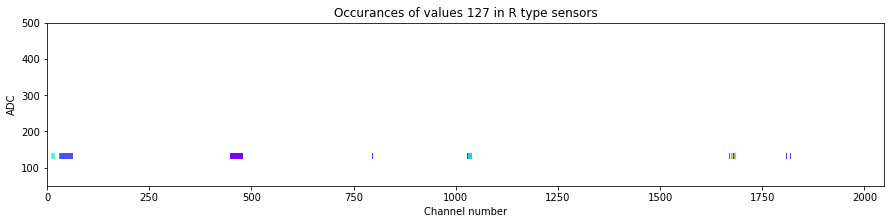

In [175]:
data = outliers2
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30], range=[[0,2048],[50,500]],cmin=1)
axe.set_title('Occurances of values 127 in R type sensors')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

C:\tools\Anaconda3\lib\site-packages\numpy\lib\function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


Text(0,0.5,'ADC')

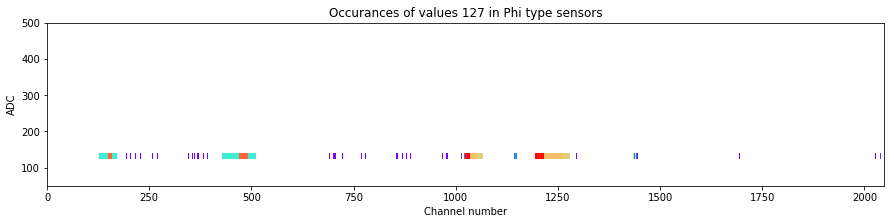

In [176]:
data = outliers2_phi
px, py = sensor_histogram(data)
fig, axe = plt.subplots(1,1,figsize=(15,3))
_ = plt.hist2d(px, py, bins=[2048,30], range=[[0,2048],[50,500]],cmin=1)
axe.set_title('Occurances of values 127 in Phi type sensors')
axe.set_xlabel('Channel number')
axe.set_ylabel('ADC')

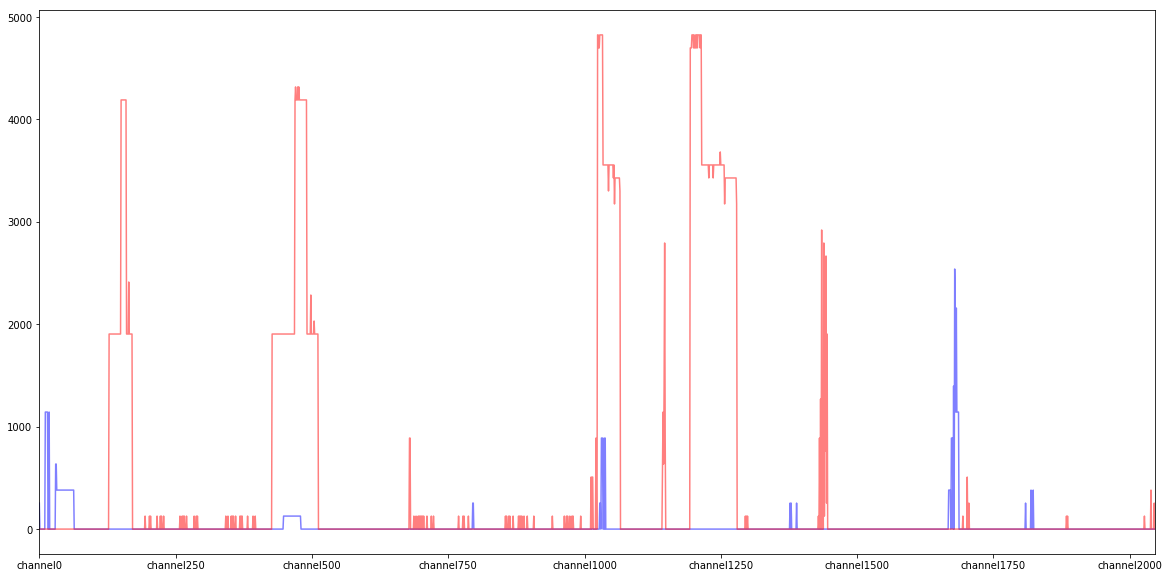

In [21]:
outliers2.sum().plot(figsize=(20,10),color='blue', alpha=0.5)
outliers2_phi.sum().plot(figsize=(20,10),color='red', alpha=0.5)

In [22]:
val3 = outliers2[occurance_per_row!=0].values
np.unique(val3[~np.isnan(val3)])

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

In [23]:
fault_channels = outliers2.columns[outliers2[occurance_per_row!=0].sum()!=0].values
fault_channels_numbers = list(map(lambda x : int(x[7:]), fault_channels))
fcn = np.array(fault_channels_numbers)
fcn

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

1024:1054,1056: 1065,1194:1214,1216:1278

In [24]:
occurance_per_row = filtered2.sum(axis=1)
chart3_df = other.df.drop(other.df.iloc[:,9:].columns , axis=1)
chart3_df['occurances'] = occurance_per_row

Text(0,0.5,'# of occurances')

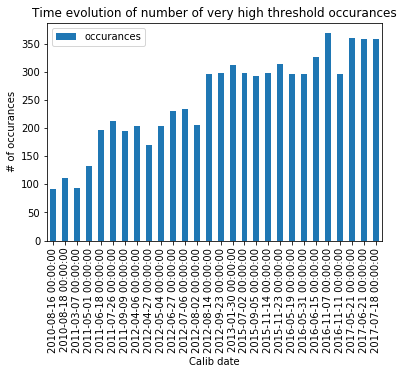

In [25]:
axe = chart3_df.groupby(['datetime']).sum().plot(y='occurances',kind='bar')
axe.set_title('Time evolution of number of very high threshold occurances')
axe.set_xlabel('Calib date')
axe.set_ylabel('# of occurances')

In [26]:
chart_tested = chart3_df[chart3_df.occurances != 0]

In [27]:

x = chart_tested.datetime
labels = chart_tested['sensor_number'].unique()
todf = {k:[] for k in labels}
yx = []
for date in x:
    for label in labels:
        data_ = chart_tested[chart_tested.datetime==date]
        val = data_[data_.sensor_number==label].occurances.values
        if not val:
            val = 0
        else:
            val = val[0]
        todf[label].append(val)
occurances_df3 = pd.DataFrame(todf,index=x.values)
occurances_df3 = occurances_df3.sort_index()
occurances_df3 = occurances_df3.drop_duplicates()

In [28]:
run1 = occurances_df3[occurances_df3.index <= '2013-01-30']

In [29]:
run2 = occurances_df3[occurances_df3.index > '2013-01-30']

In [30]:
run1 = run1.drop(run1.columns[run1.sum()==0],axis=1)

Text(0,0.5,'Number of occurances')

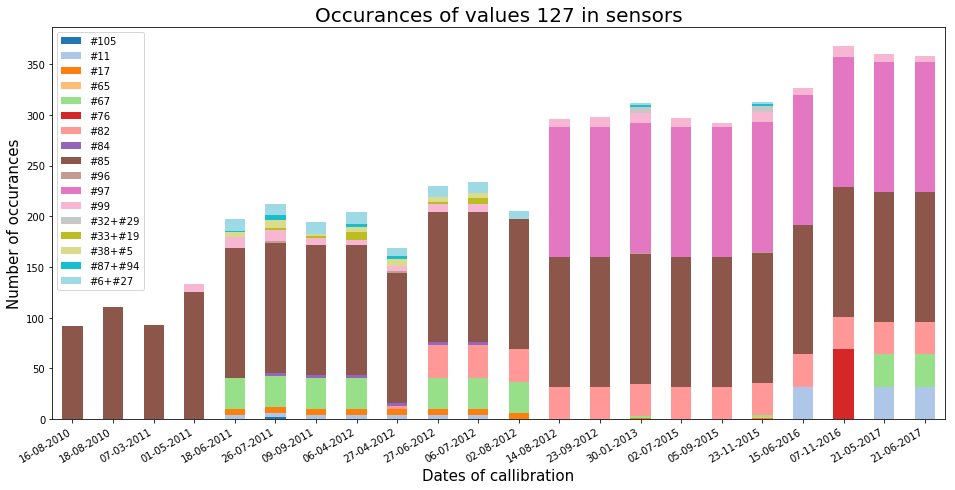

In [181]:
fig, axe = plt.subplots(1,1,figsize=(16,8))
occruances_df_plot1 = occurances_df3.copy()
occruances_df_plot1["#32+#29"] = occruances_df_plot1["#32"]+occruances_df_plot1["#29"]
occruances_df_plot1["#33+#19"] = occruances_df_plot1["#33"]+occruances_df_plot1["#19"]
occruances_df_plot1["#38+#5"] = occruances_df_plot1["#38"]+occruances_df_plot1["#5"]
occruances_df_plot1["#87+#94"] = occruances_df_plot1["#87"]+occruances_df_plot1["#94"]
occruances_df_plot1["#6+#27"] = occruances_df_plot1["#6"]+occruances_df_plot1["#27"]
del occruances_df_plot1["#32"]
del occruances_df_plot1["#29"]
del occruances_df_plot1["#19"]
del occruances_df_plot1["#33"]
del occruances_df_plot1["#38"]
del occruances_df_plot1["#5"]
del occruances_df_plot1["#87"]
del occruances_df_plot1["#94"]
del occruances_df_plot1["#6"]
del occruances_df_plot1["#27"]
occruances_df_plot1.plot(kind='bar', ax=axe,align="center", stacked=True, colormap='tab20')
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(occurances_df3.index.to_series().dt.strftime("%d-%m-%Y")))
fig.autofmt_xdate()
axe.set_title('Occurances of values 127 in sensors', fontsize=20)
axe.set_xlabel('Dates of callibration', fontsize=15)
axe.set_ylabel('Number of occurances', fontsize=15)

In [134]:
dataplot = occurances_df3.copy()


In [33]:
for sensor,column in occurances_df3.iteritems():
    dataplot[sensor][column!=0]=int(sensor[1:])
dataplot = dataplot.transpose()

In [34]:
neworder = list(map(lambda x: "#"+str(x),sorted(int(col[1:]) for col in occurances_df3.columns)))

In [35]:
occurances_df4 = occurances_df3.reindex_axis(neworder, axis=1)
occurances_df4

#5  #6  #11  #17  #19  #27  #29  #32  #33  #38  ...   #76  #82  \
2010-08-16   0   0    0    0    0    0    0    0    0    0  ...     0    0   
2010-08-18   0   0    0    0    0    0    0    0    0    0  ...     0    0   
2011-03-07   0   0    0    0    0    0    0    0    0    0  ...     0    0   
2011-05-01   0   0    0    0    0    0    0    0    0    0  ...     0    0   
2011-06-18   0   8    4    6    0    3    0    0    0    5  ...     0    0   
2011-07-26   2   8    4    6    0    3    0    0    2    5  ...     0    0   
2011-09-09   2   8    4    6    0    3    0    0    2    0  ...     0    0   
2012-04-06   0   8    4    6    6    3    0    0    2    5  ...     0    0   
2012-04-27   2   8    4    6    0    0    0    0    0    5  ...     0    3   
2012-06-27   0   8    4    6    0    3    0    0    2    5  ...     0   32   
2012-07-06   0   8    4    6    6    3    0    0    0    5  ...     0   32   
2012-08-02   0   8    0    6    0    0    0    0    0    0  ...     0   32   
2012-08-14   0   0    0    0    0    0    0    0    0    0  ...     0   32   
2012-09-23   0   0    0    0    0    0    0    0    0    0  ...     0   32   
2013-01-30   0   2    0    1    0    0    2    4    0    0  ...     0   32   
2015-07-02   0   0    0    0    0    0    0    0    0    0  ...     0   32   
2015-09-05   0   0    0    0    0    0    0    0    0    0  ...     0   32   
2015-11-23   0   2    0    1    0    0    2    4    0    0  ...     0   32   
2016-06-15   0   0   32    0    0    0    0    0    0    0  ...     0   32   
2016-11-07   0   0    0    0    0    0    0    0    0    0  ...    69   32   
2017-05-21   0   0   32    0    0    0    0    0    0    0  ...     0   32   
2017-06-21   0   0   32    0    0    0    0    0    0    0  ...     0   32   

            #84  #85  #87  #94  #96  #97  #99  #105  
2010-08-16    0   92    0    0    0    0    0     0  
2010-08-18    0  111    0    0    0    0    0     0  
2011-03-07    0   93    0    0    0    0    0     0  
2011-05-01    0  125    0    0    0    0    8     0  
2011-06-18    0  128    0    1    0    0   11     0  
2011-07-26    3  128    2    3    2    0   11     2  
2011-09-09    3  128    0    0    0    0    7     0  
2012-04-06    3  128    0    3    0    0    5     0  
2012-04-27    3  128    0    3    2    0    5     0  
2012-06-27    3  128    0    0    0    0    8     0  
2012-07-06    3  128    0    0    0    0    8     0  
2012-08-02    0  128    0    0    0    0    0     0  
2012-08-14    0  128    0    0    0  128    8     0  
2012-09-23    0  128    0    0    0  128   10     0  
2013-01-30    0  128    2    0    1  128   10     0  
2015-07-02    0  128    0    0    0  128    9     0  
2015-09-05    0  128    0    0    0  128    4     0  
2015-11-23    0  128    2    0    1  128   10     0  
2016-06-15    0  128    0    0    0  128    7     0  
2016-11-07    0  128    0    0    0  128   11     0  
2017-05-21    0  128    0    0    0  128    8     0  
2017-06-21    0  128    0    0    0  128    6     0  

[22 rows x 22 columns]

2010-08-16    0
2010-08-18    0
2011-03-07    0
2011-05-01    0
2011-06-18    0
2011-07-26    2
2011-09-09    2
2012-04-06    0
2012-04-27    2
2012-06-27    0
2012-07-06    0
2012-08-02    0
2012-08-14    0
2012-09-23    0
2013-01-30    0
2015-07-02    0
2015-09-05    0
2015-11-23    0
2016-06-15    0
2016-11-07    0
2017-05-21    0
2017-06-21    0
Name: #5, dtype: int64
2010-08-16 00:00:00 | 0 0 | 734000.0 734000.0
2010-08-18 00:00:00 | 0 0 | 734002.0 734002.0
2011-03-07 00:00:00 | 0 0 | 734203.0 734203.0
2011-05-01 00:00:00 | 0 0 | 734258.0 734258.0
2011-06-18 00:00:00 | 0 0 | 734306.0 734306.0
2011-07-26 00:00:00 | 2 2 | 734344.0 734344.0
2011-09-09 00:00:00 | 2 2 | 734389.0 734389.0
here
2012-04-06 00:00:00 | 0 0 | 734599.0 734389.0
2012-04-27 00:00:00 | 2 2 | 734620.0 734620.0
here
2012-06-27 00:00:00 | 0 0 | 734681.0 734620.0
2012-07-06 00:00:00 | 0 0 | 734690.0 734690.0
2012-08-02 00:00:00 | 0 0 | 734717.0 734717.0
2012-08-14 00:00:00 | 0 0 | 734729.0 734729.0
2012-09-23 00:00:

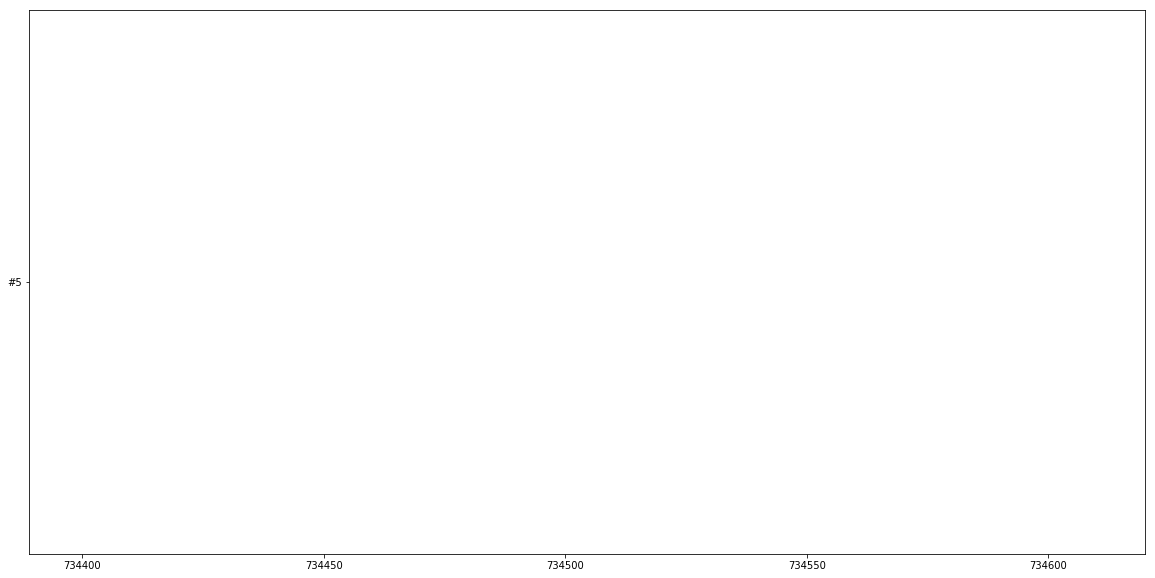

In [36]:
import matplotlib.dates as mdates
fig, axe = plt.subplots(1,1,figsize=(20,10))

for sensor, column in occurances_df4.iteritems():
    print(column)
    prev = 0 
    end = 0
    value = 0
    for date, value in column.iteritems():
        if value != prev and prev != 0:
            print("here")
            axe.barh(sensor,  end-start, left=start)
        else:
            start = mdates.date2num(date)
        end = mdates.date2num(date)
        prev = value
        print(date, "|", value, prev, "|" ,end, start)
    break
    #axe.barh("#36",  40, left=1995)


In [37]:
y_l

NameError: name 'y_l' is not defined

In [ ]:
len(enddates)

In [67]:
mdates.num2date(735000)

datetime.datetime(2013, 5, 12, 0, 0, tzinfo=<matplotlib.dates._UTC object at 0x000002BF6193C5F8>)

In [109]:
y_labels

['#5',
 '#6',
 '#11',
 '#17',
 '#19',
 '#27',
 '#29',
 '#32',
 '#33',
 '#38',
 '#65',
 '#67',
 '#76',
 '#82',
 '#84',
 '#85',
 '#87',
 '#94',
 '#96',
 '#97',
 '#99',
 '#105']

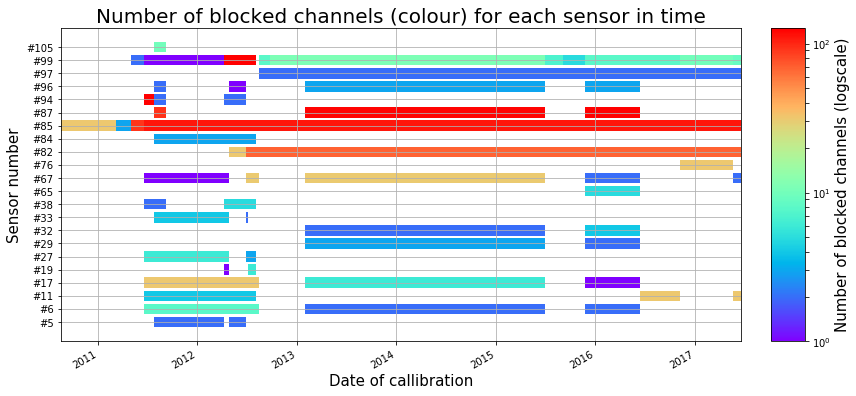

In [129]:
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colorbar import ColorbarBase
norm = LogNorm(vmin=1,vmax=128)
fig, axe = plt.subplots(1,2,figsize=(12,6), gridspec_kw = {'width_ratios':[20, 1]})
y_labels = occurances_df4.columns.tolist()
sensor_to_y = dict(zip(y_labels,range(len(y_labels))))
startdates = []
enddates = []
intervals = []
values = []
y_l = []
for sensor, column in occurances_df4.iteritems():
    prev = 0 
    end = 0
    value = 0
    recordval = 0
    size = len(column)
    for i, (date, value) in enumerate(column.iteritems()):
        datepy = date.to_pydatetime()
        if prev!=value and recordval==0:
            start = datepy
            recordval = value
            values.append(value)
            startdates.append(datepy)
            #print("start",datepy,"val",value)
        elif prev!=value:
            end=datepy
            enddates.append(end)
            y_l.append(sensor)
            #print("end",datepy,"val",value)
            if value!=0:
                start = datepy
                values.append(value)
                startdates.append(datepy)
                #print("start",datepy,"val",value)
            recordval=value
        if value==recordval and (i==size-1 and recordval!=0):
            values.append(value)
            end=datepy
            enddates.append(end)
            y_l.append(sensor)
            #print("end",datepy,"val",value)
            recordval=0
        prev = value
maxval = occurances_df4.max().max()
cmap = plt.get_cmap("rainbow")
color_values = [cmap(norm(v)) for v in values]
edate, bdate = [mdates.date2num(item) for item in (enddates, startdates)]
yl = ["#"+str(100+y_labels.index(u)) for u in y_l]
axe[0].barh(yl, edate-bdate , left=bdate, color = color_values)    
axe[0].set_yticklabels(y_labels)
axe[0].xaxis_date()
axe[0].grid()
axe[0].set_title('Number of blocked channels (colour) for each sensor in time',fontsize=20)
axe[0].set_xlabel('Date of callibration',fontsize=15)
axe[0].set_ylabel('Sensor number',fontsize=15)
undates = np.unique(np.array(edate+bdate))
cb2 = ColorbarBase(axe[1], cmap=cmap,norm=norm,orientation='vertical')
axe[1].set_ylabel('Number of blocked channels (logscale)',fontsize=15)
axe[1].yaxis.set_label_position("right")
fig.tight_layout()
fig.autofmt_xdate()